In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
df=pd.read_excel('/Users/ianfla/Desktop/Others/weight/weight.xlsx',engine='openpyxl',header=None)
t=df[2].values[0:-1]
w=df[1].values[0:-1]
goal=65

In [2]:
df.tail()

,0,1,2
107,210312,76.4,118.0
108,210313,76.8,119.0
109,210314,77.0,120.0
110,210315,77.0,121.0
111,210316,NaN,NaN


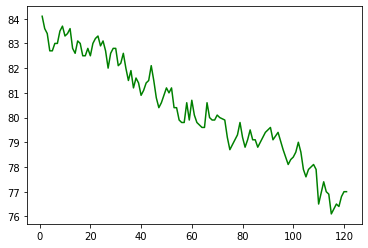

process: 37.17%
remaining time: 202.82 days


In [3]:
plt.plot(t,w,c='g')
plt.show()
p=(w[0]-w[-1])/(w[0]-goal)
print('process:',str(round(p*100,ndigits=2))+'%')
print('remaining time:',round((t[-1]-t[0])*(1-p)/p,ndigits=2),'days')